# Executive Summary

# High Level Goal

Your team has been hired to provide research for a political campaign. They have obtained a dataset of crime statistics for a selection of counties in North Carolina.

Your task is to examine the data to help the campaign understand the determinants of crime and to generate policy suggestions that are applicable to local government.

My Takeaway: Fundamentally, our goal is to
* A. _help understand the determinants of crime_
* B. _make informed policy suggestions accordingly_

_A_ will be a statistical task, and doing _B_ will be require us to wear socio-political hats. Presumably, the interest of our audience, a political campaign is to pitch itself to the public for election using informed policy ideas for _reducing_ crime.

In order to A, we must identify a measurable proxy for crime. I think that the most natural choice for this is the variable `crmrte` giving the crimes committed per person.


In [2]:
# Load the data
crime <- read.csv('crime_v2.csv')

## Exploratory Analysis

Checking for missing values.

In [3]:
summary(is.na(crime))

   county           year           crmrte          prbarr       
 Mode :logical   Mode :logical   Mode :logical   Mode :logical  
 FALSE:91        FALSE:91        FALSE:91        FALSE:91       
 TRUE :6         TRUE :6         TRUE :6         TRUE :6        
  prbconv         prbpris          avgsen          polpc        
 Mode :logical   Mode :logical   Mode :logical   Mode :logical  
 FALSE:97        FALSE:91        FALSE:91        FALSE:91       
                 TRUE :6         TRUE :6         TRUE :6        
  density          taxpc            west          central       
 Mode :logical   Mode :logical   Mode :logical   Mode :logical  
 FALSE:91        FALSE:91        FALSE:91        FALSE:91       
 TRUE :6         TRUE :6         TRUE :6         TRUE :6        
   urban          pctmin80          wcon            wtuc        
 Mode :logical   Mode :logical   Mode :logical   Mode :logical  
 FALSE:91        FALSE:91        FALSE:91        FALSE:91       
 TRUE :6         TRUE :6 

The output of the summary of missing values reveals that every column has precisely 6 missing values.

In [4]:
crime[91:nrow(crime), ]
sum(is.na(crime[1:91, ]))

county year crmrte    prbarr   prbconv     prbpris  avgsen polpc     
91 197    87   0.0141928 0.207595 1.182929993 0.360825 12.23  0.00118573
92  NA    NA          NA       NA                   NA    NA          NA
93  NA    NA          NA       NA                   NA    NA          NA
94  NA    NA          NA       NA                   NA    NA          NA
95  NA    NA          NA       NA                   NA    NA          NA
96  NA    NA          NA       NA                   NA    NA          NA
97  NA    NA          NA       NA `                 NA    NA          NA
   density  taxpc    ⋯ wtuc     wtrd    wfir     wser     wmfg   wfed   wsta  
91 0.889881 25.95258 ⋯ 341.8803 182.802 348.1432 212.8205 322.92 391.72 385.65
92       NA       NA ⋯       NA      NA       NA       NA     NA     NA     NA
93       NA       NA ⋯       NA      NA       NA       NA     NA     NA     NA
94       NA       NA ⋯       NA      NA       NA       NA     NA     NA     NA
95       NA       NA ⋯       NA      NA       NA       NA     NA     NA     NA
96       NA       NA ⋯       NA      NA       NA       NA     NA     NA     NA
97       NA       NA ⋯       NA      NA       NA       NA     NA     NA     NA
   wloc   mix        pctymle   
91 306.85 0.06756757 0.07419893
92     NA         NA         NA
93     NA         NA         NA
94     NA         NA         NA
95     NA         NA         NA
96     NA         NA         NA
97     NA         NA         NA

[1] 0

The last 6 rows are filled exclusively with `NA`s, while all the rows up to and including the 91st contain no missing values. Therefore, will omit the existing `NA`s with no loss of important information. 

In [5]:
crime <- na.omit(crime)

Now, we will have a quick look at the variables data types.

In [6]:
str(crime)

'data.frame':	91 obs. of  25 variables:
 $ county  : int  1 3 5 7 9 11 13 15 17 19 ...
 $ year    : int  87 87 87 87 87 87 87 87 87 87 ...
 $ crmrte  : num  0.0356 0.0153 0.013 0.0268 0.0106 ...
 $ prbarr  : num  0.298 0.132 0.444 0.365 0.518 ...
 $ prbconv : Factor w/ 92 levels "","`","0.068376102",..: 63 89 13 62 52 3 59 78 42 86 ...
 $ prbpris : num  0.436 0.45 0.6 0.435 0.443 ...
 $ avgsen  : num  6.71 6.35 6.76 7.14 8.22 ...
 $ polpc   : num  0.001828 0.000746 0.001234 0.00153 0.00086 ...
 $ density : num  2.423 1.046 0.413 0.492 0.547 ...
 $ taxpc   : num  31 26.9 34.8 42.9 28.1 ...
 $ west    : int  0 0 1 0 1 1 0 0 0 0 ...
 $ central : int  1 1 0 1 0 0 0 0 0 0 ...
 $ urban   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ pctmin80: num  20.22 7.92 3.16 47.92 1.8 ...
 $ wcon    : num  281 255 227 375 292 ...
 $ wtuc    : num  409 376 372 398 377 ...
 $ wtrd    : num  221 196 229 191 207 ...
 $ wfir    : num  453 259 306 281 289 ...
 $ wser    : num  274 192 210 257 215 ...
 $ wmfg    : num  33

All of the variables in this dataset aside are conceptually numeric, but the probabilty of conviction, `prbarr` has been inferred as a factor. Therefore, it is necessary to cast it as a numeric variable.

In [7]:
crime$prbconv <- as.numeric(crime$prbconv)

The probabilty of conviction variable `prbconv` is registered as a factor, so we must cast it as a numeric before proceeding with EDA.

In [9]:
# Function for displaying a correlation matrix for particular columns
cor_mat <- function(cols, df=crime){
    mat <- cor(crime[ , names(crime) %in% cols])
    return(round(mat, 2))
}

At first glance, it appears that there are several variables which are each individually are correlated with crime rate witha magnitude greater than 0.4. They are the following:
* `prbconv`
    * 'probaility' of conviction
    * corr with crime rate: -0.40
* `density`
    * people per square mile
    * corr with crime rate: 0.73
* `taxpc`
    * tax revenue per capita
    * corr with crime rate: 0.45
* `urban`
    * =1 if in SMSA
    * corr with crime rate: 0.62
* `wtrd`
    * wkly wge, whlesle, retail trade
    * corr with crime rate: 0.41
* `wfed`
    * wkly wge, fed employees
    * corr with crime rate: 0.49

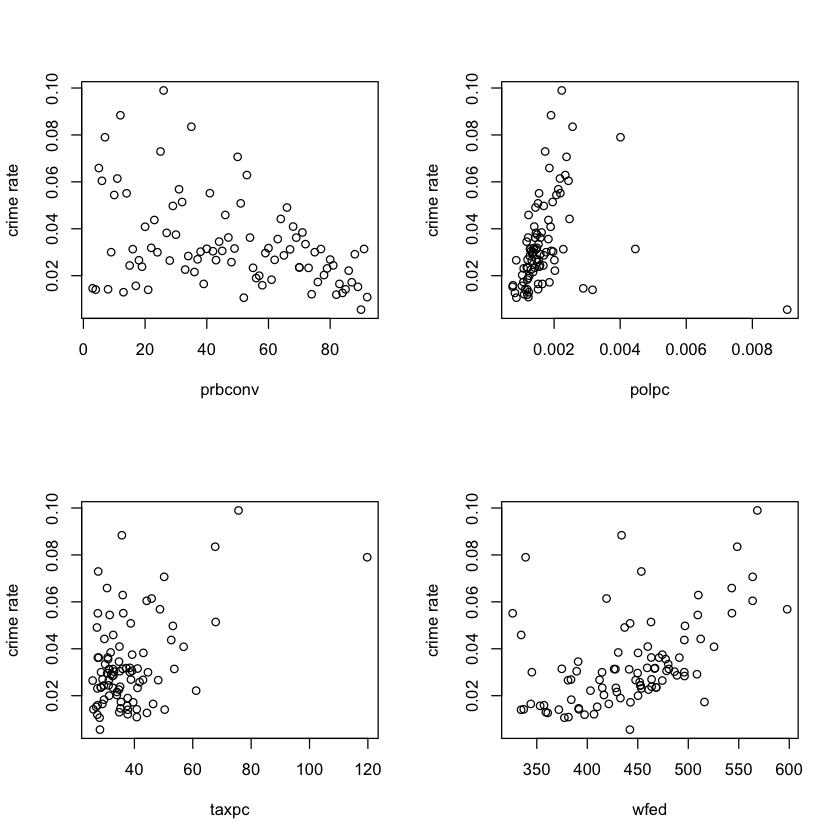

In [42]:
par(mfrow=c(2,2))
imp.cols <- c('prbconv', 'polpc', 'taxpc', 'wfed')
for(col in imp.cols){
    plot(x=crime[ ,col], y=crime[ ,'crmrte'], 
        xlab = col, ylab = 'crime rate')
}

Observations:
* Lots of heteroskedascity
* `wfred` - crime relationship potentially parabolic.

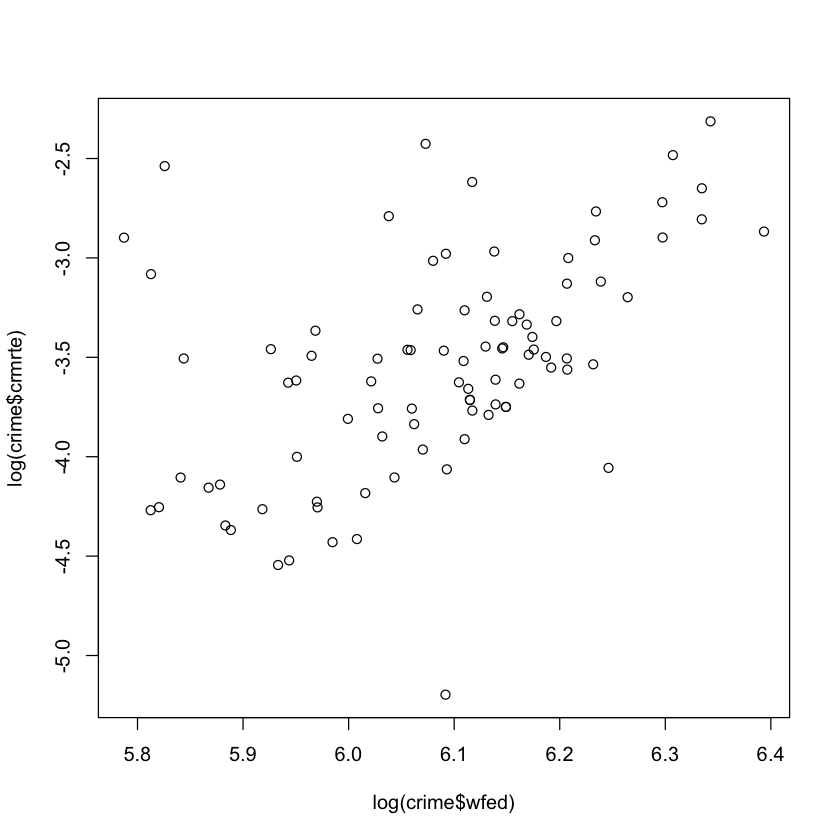

In [53]:
# log-log looks appropriate
plot(log(crime$wfed), log(crime$crmrte))

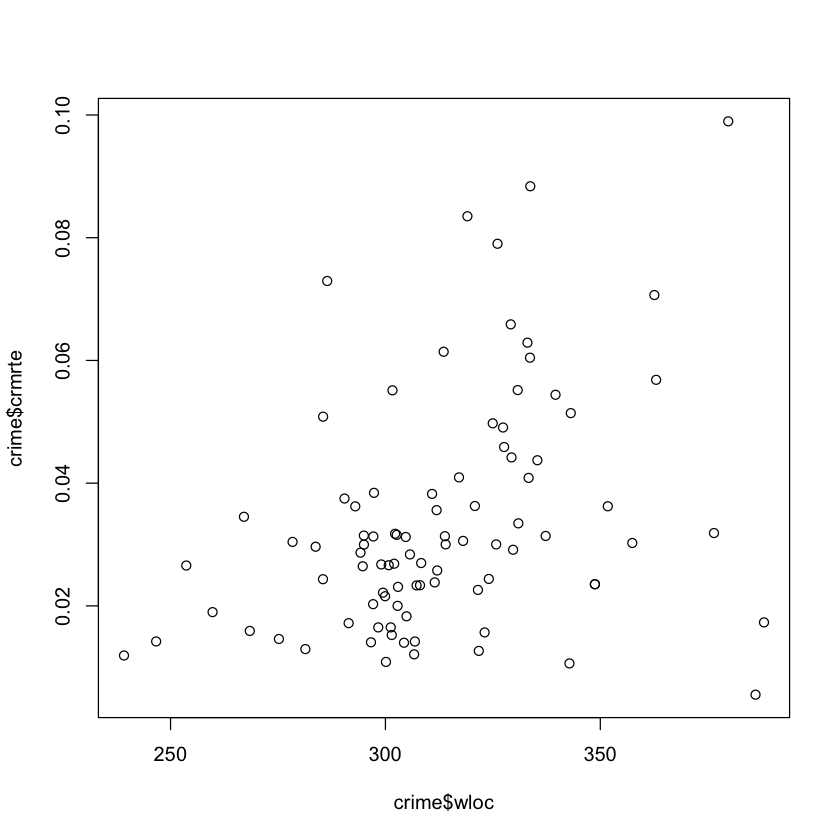

In [57]:
# log-log looks appropriate
plot(crime$wloc, crime$crmrte)

In [58]:
colnames(crime)

[1] "county"   "year"     "crmrte"   "prbarr"   "prbconv"  "prbpris" 
 [7] "avgsen"   "polpc"    "density"  "taxpc"    "west"     "central" 
[13] "urban"    "pctmin80" "wcon"     "wtuc"     "wtrd"     "wfir"    
[19] "wser"     "wmfg"     "wfed"     "wsta"     "wloc"     "mix"     
[25] "pctymle"

crmrte polpc taxpc wcon  wtuc  wtrd  wfir wser  wmfg
crmrte  1.00   0.17 0.45   0.39  0.23  0.41 0.33 -0.05 0.35
polpc   0.17   1.00 0.28  -0.02  0.17  0.11 0.19 -0.02 0.27
taxpc   0.45   0.28 1.00   0.26  0.16  0.17 0.12  0.07 0.26
wcon    0.39  -0.02 0.26   1.00  0.41  0.56 0.49 -0.01 0.35
wtuc    0.23   0.17 0.16   0.41  1.00  0.36 0.33 -0.02 0.46
wtrd    0.41   0.11 0.17   0.56  0.36  1.00 0.67 -0.02 0.36
wfir    0.33   0.19 0.12   0.49  0.33  0.67 1.00  0.01 0.49
wser   -0.05  -0.02 0.07  -0.01 -0.02 -0.02 0.01  1.00 0.01
wmfg    0.35   0.27 0.26   0.35  0.46  0.36 0.49  0.01 1.00

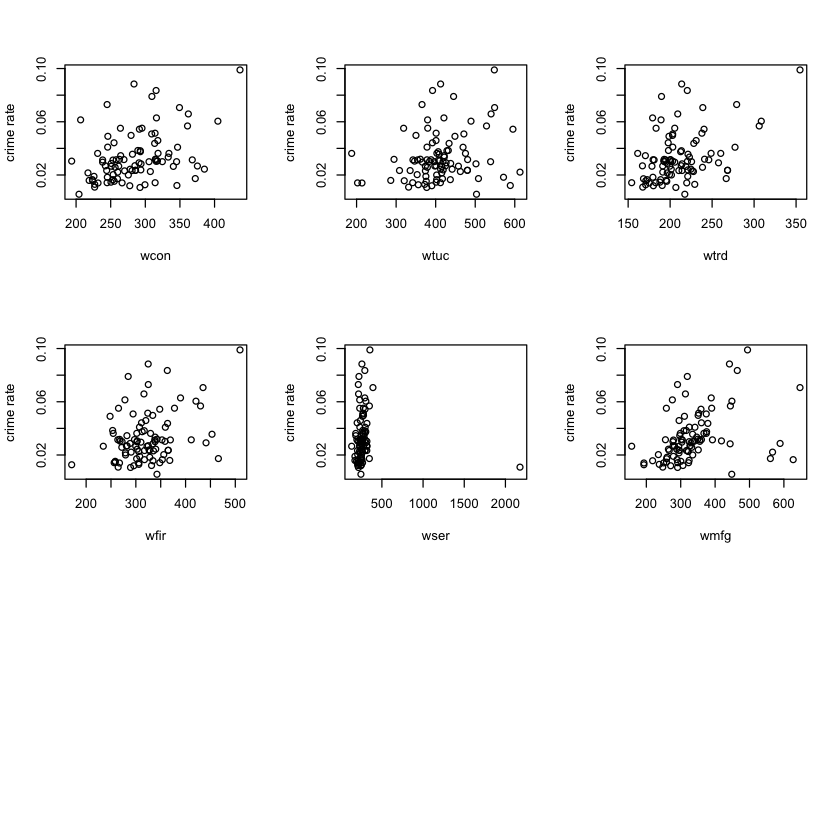

In [67]:
par(mfrow=c(3,3))
imp.cols <- c('wcon', 'wtuc', 'wtrd', 'wfir', 'wser', 'wmfg')
for(col in imp.cols){
    plot(x=crime[ ,col], y=crime[ ,'crmrte'], 
        xlab = col, ylab = 'crime rate')
}
cor_mat <- cor(crime[ , names(crime) %in% c('crmrte', imp.cols, 'polpc', 'taxpc') ])
round(cor_mat, 2)

Let's make sure that oservations 92 and onward are the only rows with missing values

In [21]:
sum(is.na(crime[1:91, ]))

[1] 0

By the computation above we have confirmed that observations 1 through 91 have no missing values, so we can safely remove all the rows with missing values at the tail of the dataframe.

## Model Building

In [13]:
cor_mat(colnames(crime))[,'crmrte']

Warning message in cor(crime[, names(crime) %in% cols]):
“the standard deviation is zero”

county     year   crmrte   prbarr  prbconv  prbpris   avgsen    polpc 
    0.01       NA     1.00    -0.39    -0.40     0.05     0.03     0.17 
 density    taxpc     west  central    urban pctmin80     wcon     wtuc 
    0.73     0.45    -0.35     0.17     0.62     0.19     0.39     0.23 
    wtrd     wfir     wser     wmfg     wfed     wsta     wloc      mix 
    0.41     0.33    -0.05     0.35     0.49     0.20     0.35    -0.13 
 pctymle 
    0.29

>Of the variables in the dataset, we believe that two of them are are the subjects of policy, while the rest are outside the immediate scope of its control. They are the key explanatory vaiables of interest and they are the following.
* Police per Capita
    * denoted `polpc`
    * correlation with crime: 0.17
* Tax Revenue per Capita
    * denoted `taxpc`
    * correlation with crime:  0.45


> (Need explanation for why these variables)

crmrte polpc taxpc
crmrte 1.00   0.17  0.45 
polpc  0.17   1.00  0.28 
taxpc  0.45   0.28  1.00

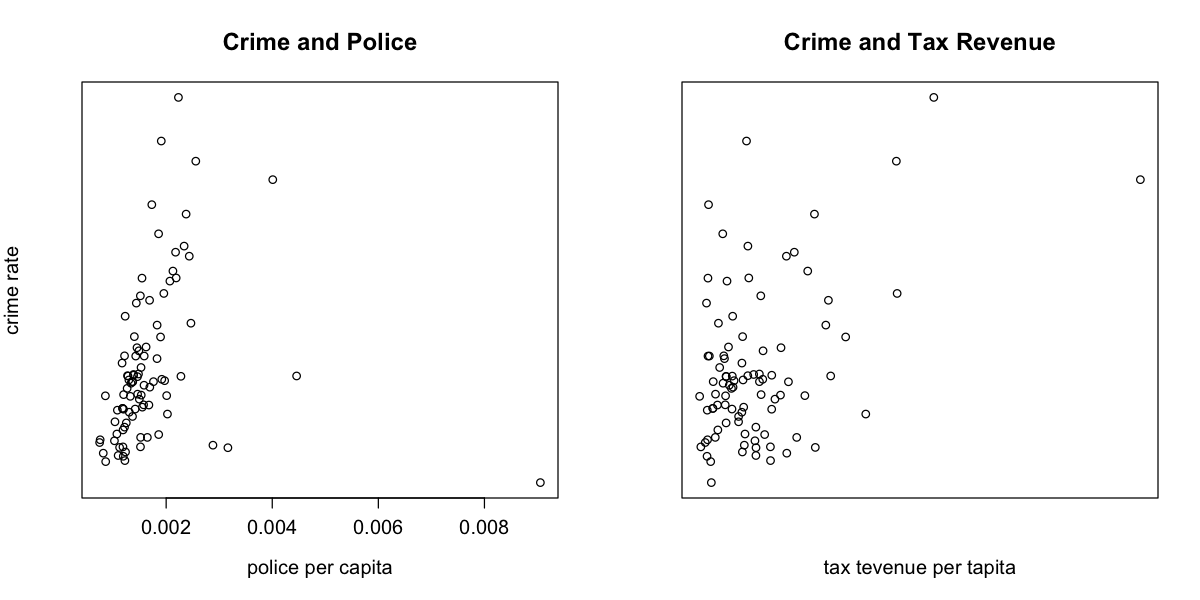

In [73]:
options(repr.plot.height = 5, repr.plot.width = 10, repr.plot.pointsize = 10)
par(mfrow=c(1,2))
y <- crime$crmrte
plot(crime$polpc, y, xlab = 'police per capita', ylab = 'crime rate', main = 'Crime and Police', yaxt='n')
plot(crime$taxpc, y, xlab = 'tax tevenue per tapita', ylab = '', main ='Crime and Tax Revenue', xaxt='n', yaxt='n')

# Correlation matrix for these variables
cor_mat(cols = c('crmrte', 'polpc', 'taxpc'))

The plot of crime against police per capita and tax revenue per capita, respectively, visually reveal postive correlations with crimerate. We can also obbserve that in each plot there may be a couple outliers.

In [66]:
# rstudent(crime$polpc)
?rstudent

In [38]:
cor(y, log(crime$polpc))

[1] 0.3914119

In [39]:
cor(y, log(crime$taxpc))

[1] 0.4155645

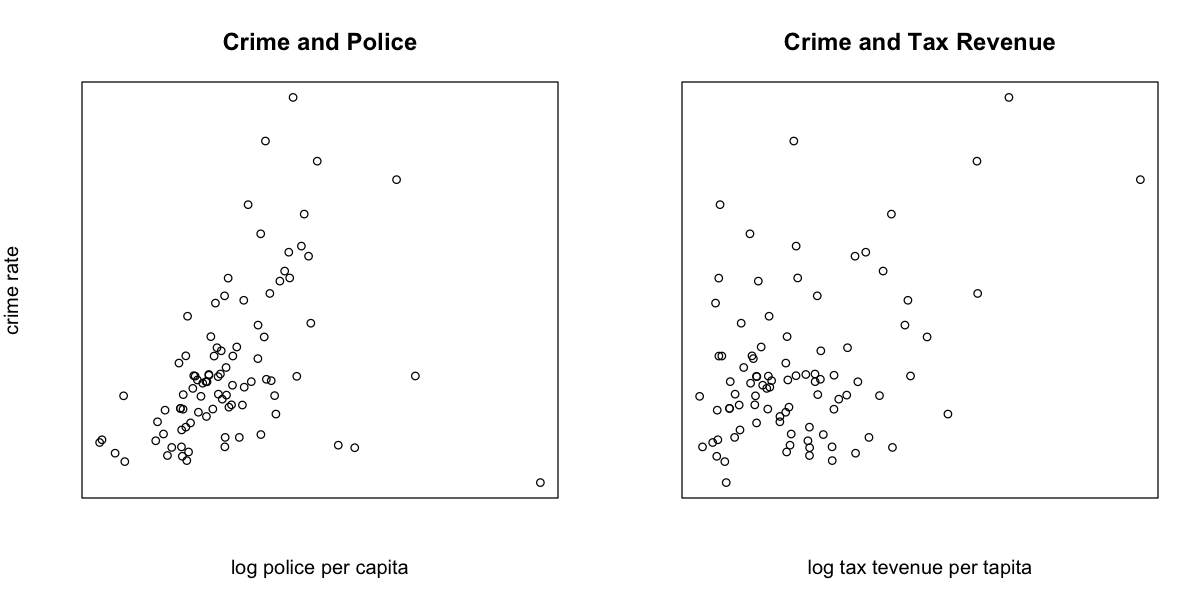

In [46]:
par(mfrow=c(1,2))
options(repr.plot.height = 5, repr.plot.width = 10, repr.plot.pointsize = 10)
par(mfrow=c(1,2))
y <- crime$crmrte
plot(log(crime$polpc), y, xlab = 'log police per capita', 
     ylab = 'crime rate', main = 'Crime and Police', xaxt='n', yaxt='n')
plot(log(crime$taxpc), y, xlab = 'log tax tevenue per tapita', 
     ylab = '', main ='Crime and Tax Revenue', xaxt='n', yaxt='n')



In [64]:
cor(data.frame(crime$crmrte, log(crime[,c('polpc', 'taxpc')])))

crime.crmrte polpc     taxpc    
crime.crmrte 1.0000000    0.3914119 0.4155645
polpc        0.3914119    1.0000000 0.3878151
taxpc        0.4155645    0.3878151 1.0000000

Log transforming police per capita results in a higher linear correlation with crime rate, and reduces the extremeness of outliers.

Thus our baseline model for understanding the determinants of crime will be a multiple OLS regression of the following form:

$$ crimerate = \beta_0 + \beta_1\log polpc + \beta_2taxpc + \epsilon$$

In [68]:
?rstudent

In [97]:
model.1 <- lm(crmrte ~ log(polpc) + taxpc, data=crime)
summary(model.1)



Call:
lm(formula = crmrte ~ log(polpc) + taxpc, data = crime)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.045021 -0.008537 -0.001528  0.007064  0.053654 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.0955835  0.0353739   2.702 0.008267 ** 
log(polpc)  0.0125874  0.0050674   2.484 0.014886 *  
taxpc       0.0005033  0.0001447   3.479 0.000785 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01641 on 88 degrees of freedom
Multiple R-squared:  0.2556,	Adjusted R-squared:  0.2387 
F-statistic: 15.11 on 2 and 88 DF,  p-value: 2.291e-06


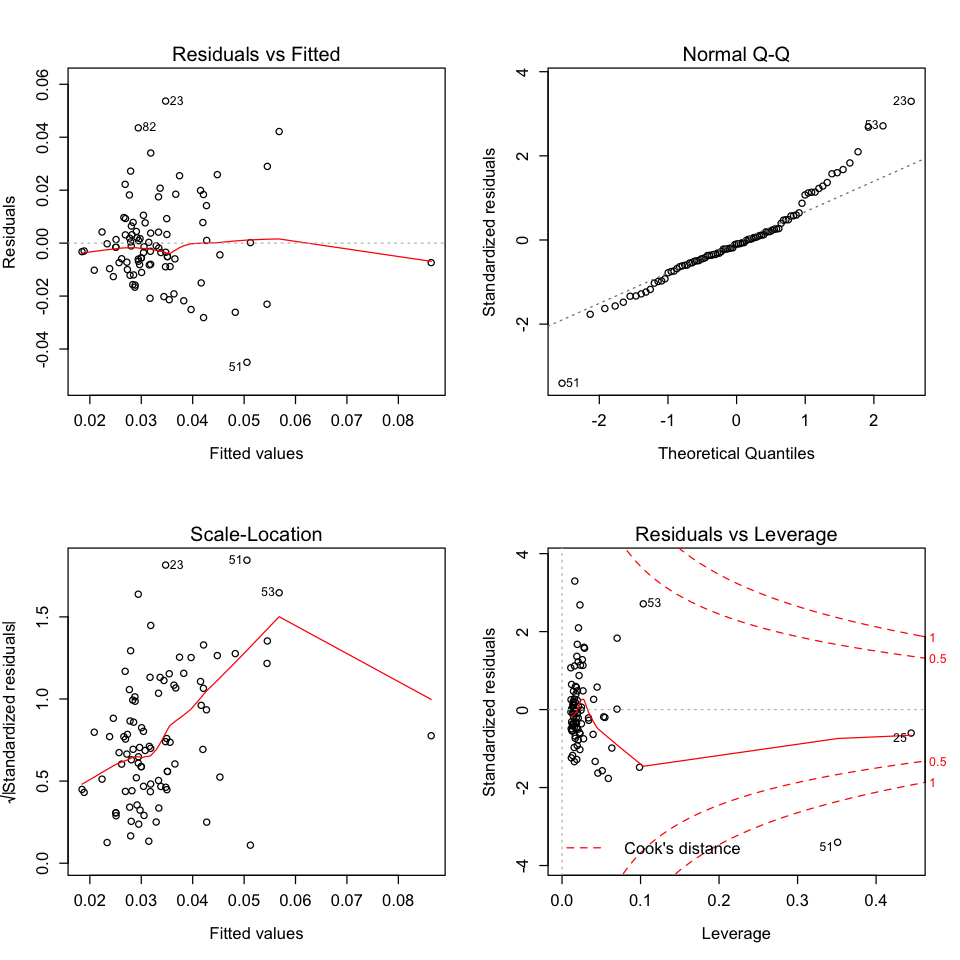

In [98]:
options(repr.plot.height = 8, repr.plot.width = 8, repr.plot.pointsize = 10)
par(mfrow = c(2,2))
plot(model.1)

It appears that osbervation number 51 is an outlier which has heavily influenced the model. Let's take it out and retrain the regression model.

In [106]:
model.1.1 <- lm(crmrte ~ log(polpc) + taxpc, data=crime[-c(51),])
summary(model.1.1)


Call:
lm(formula = crmrte ~ log(polpc) + taxpc, data = crime[-c(51), 
    ])

Residuals:
      Min        1Q    Median        3Q       Max 
-0.037677 -0.008086 -0.000594  0.005202  0.049976 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.1834170  0.0410293   4.470 2.34e-05 ***
log(polpc)  0.0249591  0.0058436   4.271 4.95e-05 ***
taxpc       0.0003159  0.0001451   2.178   0.0321 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01538 on 87 degrees of freedom
Multiple R-squared:  0.3373,	Adjusted R-squared:  0.3221 
F-statistic: 22.14 on 2 and 87 DF,  p-value: 1.687e-08


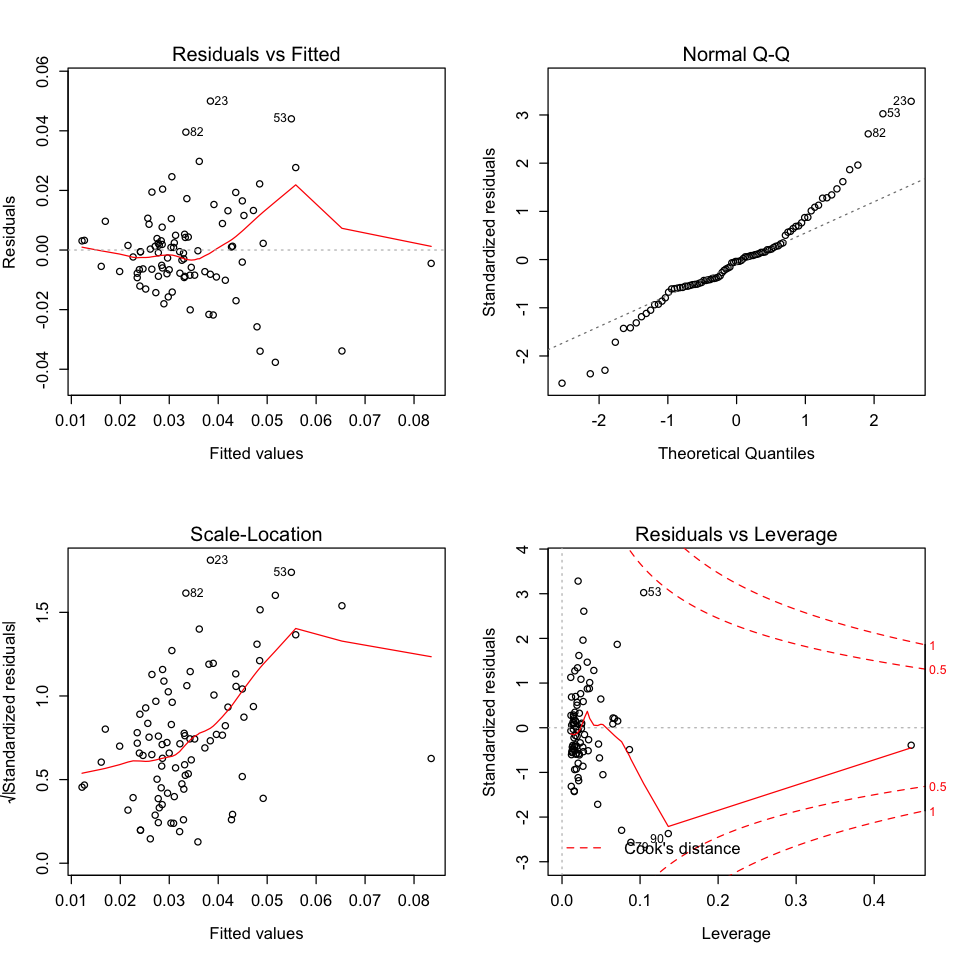

In [107]:
options(repr.plot.height = 8, repr.plot.width = 8, repr.plot.pointsize = 10)
par(mfrow = c(2,2))
plot(model.1.1)

We want to be careful to not introduce new explanatory variables that are collinear with either `polpc` or `taxpc`.

[1] 0.4861558

[1] 0.4983801

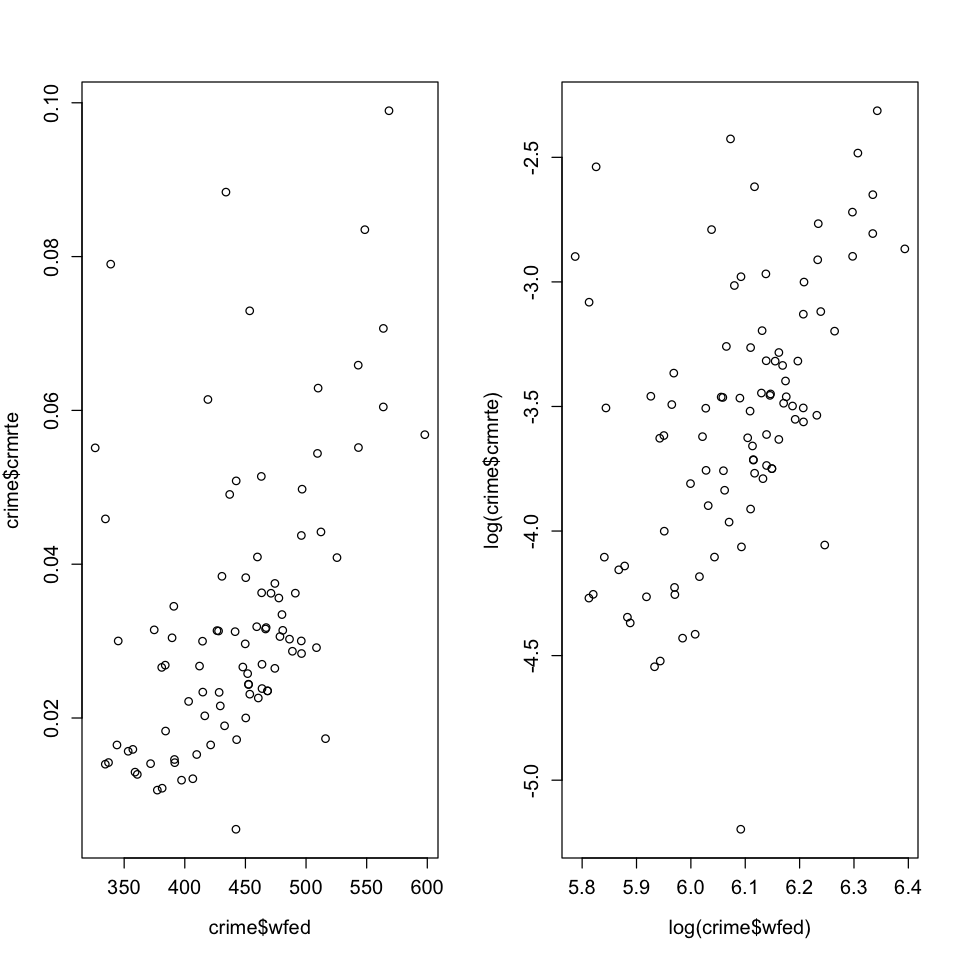

In [108]:

par(mfrow = c(1,2))
plot(crime$wfed, crime$crmrte)
plot(log(crime$wfed), log(crime$crmrte))
cor(crime$wfed, crime$crmrte)
cor(log(crime$wfed), log(crime$crmrte))

In [109]:
model.2 <- lm(crmrte ~ log(polpc) + taxpc + urban + west + pctmin80 + central + density + pctymle, data=crime)
summary(model.2)


Call:
lm(formula = crmrte ~ log(polpc) + taxpc + urban + west + pctmin80 + 
    central + density + pctymle, data = crime)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.020456 -0.005830 -0.000875  0.004372  0.039154 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.510e-02  2.677e-02   1.311  0.19337    
log(polpc)   5.817e-03  3.456e-03   1.683  0.09616 .  
taxpc        2.802e-04  1.050e-04   2.669  0.00918 ** 
urban       -4.515e-03  7.145e-03  -0.632  0.52921    
west        -8.049e-03  4.320e-03  -1.863  0.06600 .  
pctmin80     1.464e-04  9.812e-05   1.492  0.13959    
central     -4.847e-03  3.038e-03  -1.595  0.11454    
density      8.559e-03  1.436e-03   5.962 6.04e-08 ***
pctymle      1.609e-01  5.057e-02   3.181  0.00207 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01043 on 82 degrees of freedom
Multiple R-squared:  0.7202,	Adjusted R-squared:  0.6929 
F-statistic: 

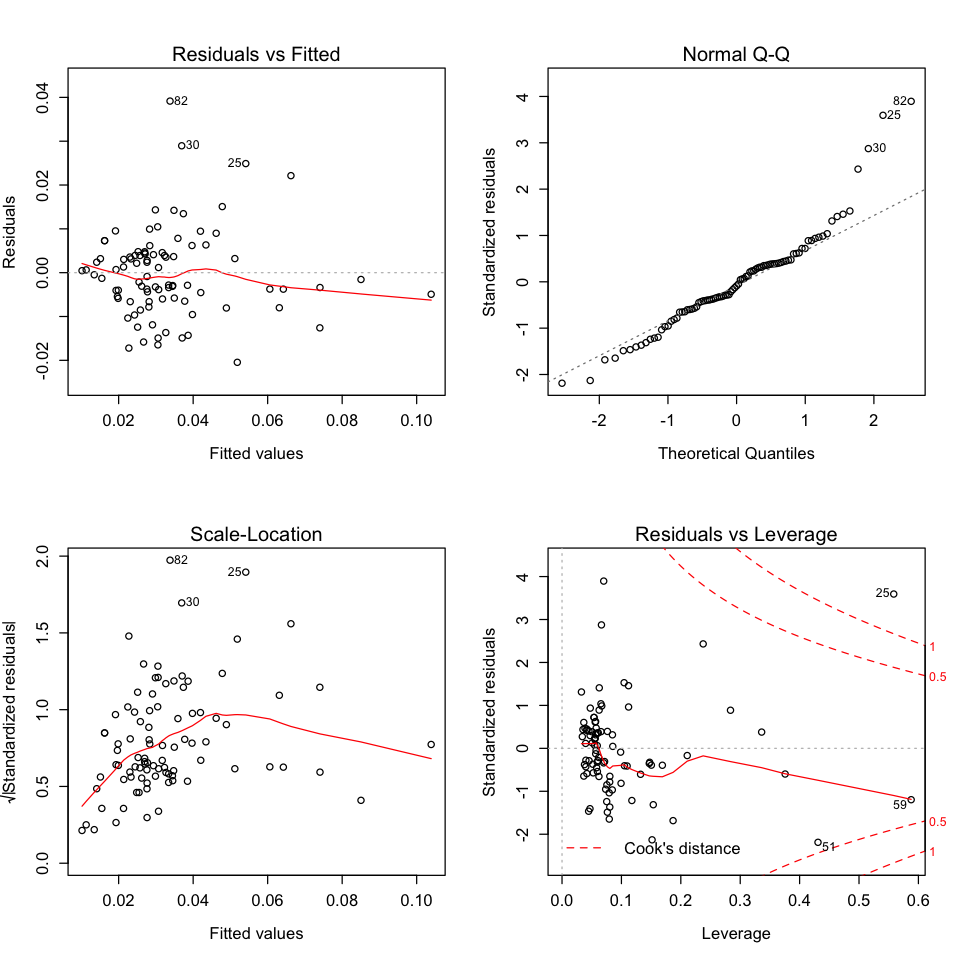

In [110]:
options(repr.plot.height = 8, repr.plot.width = 8, repr.plot.pointsize = 10)
par(mfrow = c(2,2))
plot(model.2)

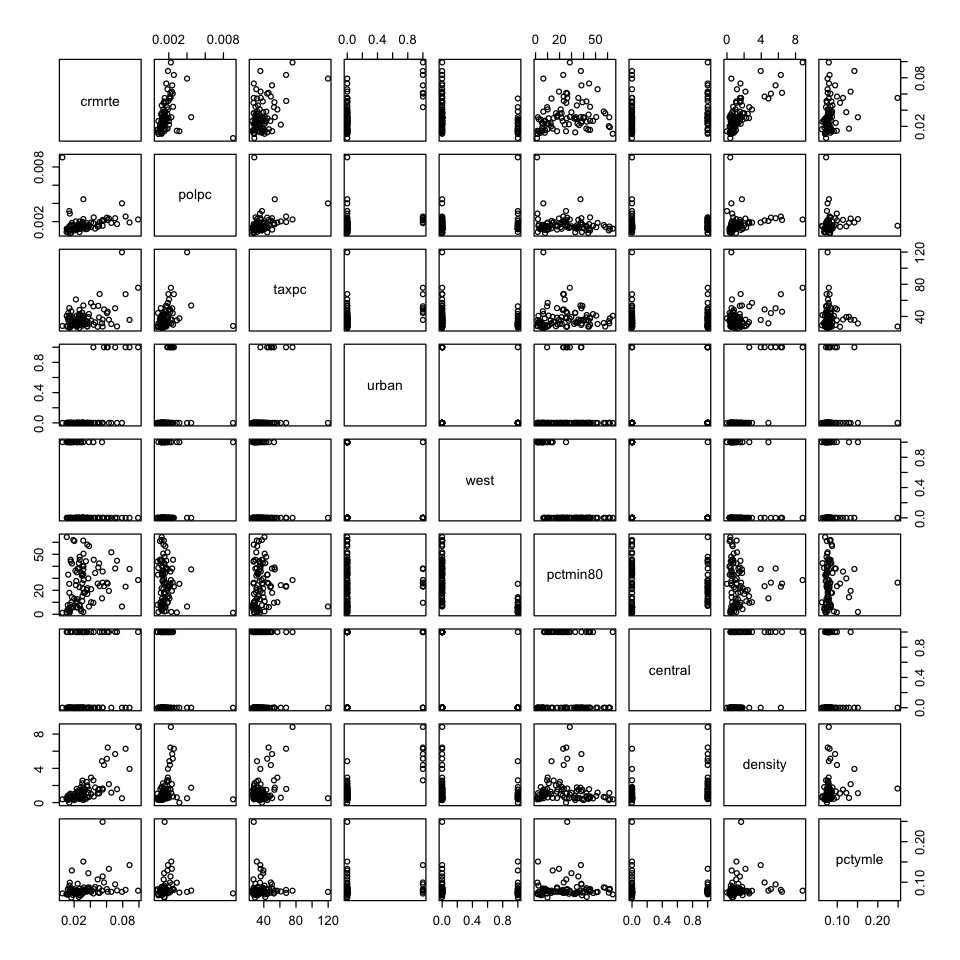

In [113]:
pairs(crime[, c('crmrte', 'polpc','taxpc', 'urban', 'west','pctmin80','central','density','pctymle')])

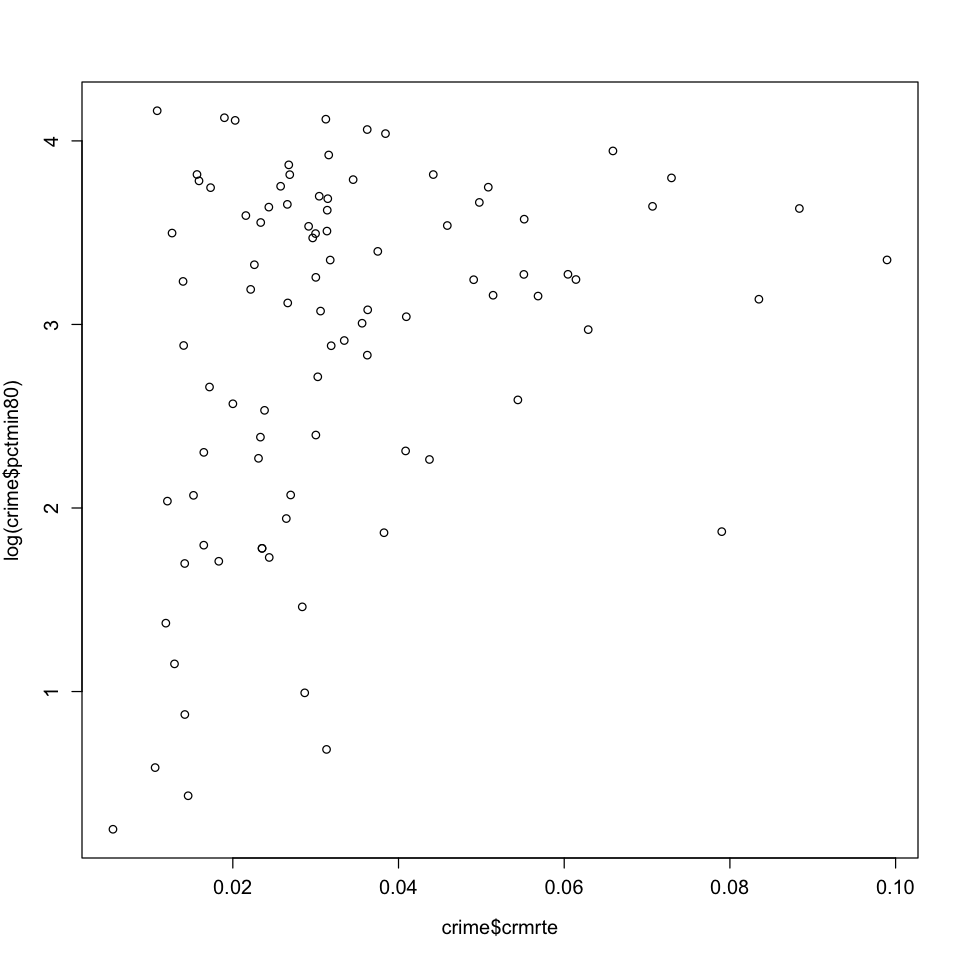

In [124]:
plot(crime$crmrte, log(crime$pctmin80))